# Practice Lab 3: Random Forest from scratch (we really hope!)

## Data Creation 

In [2]:
from numpy.random import default_rng
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [46]:
seed = 123
rng = default_rng(seed = 69)

X = rng.integers(0, 1000, size = (10, 6))
X

array([[ 53, 580, 675, 526, 783, 864],
       [417, 734, 886, 476, 703, 816],
       [680, 544, 790, 437, 782,   8],
       [630, 678, 548, 786,  23, 705],
       [145, 962, 663, 721, 646,  11],
       [517, 927, 170, 822, 474, 681],
       [249, 733, 586,  68, 795,  18],
       [305, 537,  93, 901, 406, 721],
       [824, 895, 305, 293, 698, 469],
       [950, 286, 691, 548, 578, 863]], dtype=int64)

## Create Bootstrap Samples (Physical)

In [ ]:
brb
gbb
gbr
rrb
brg

## Create Bootstrap Samples (Code)

In [55]:
bs = rng.choice(X, size = X.shape[0], replace = True)
bs

#random_numbers = [random.randint(0, 9) for _ in range(10)]

#print(random_numbers)

array([[824, 895, 305, 293, 698, 469],
       [305, 537,  93, 901, 406, 721],
       [630, 678, 548, 786,  23, 705],
       [680, 544, 790, 437, 782,   8],
       [680, 544, 790, 437, 782,   8],
       [517, 927, 170, 822, 474, 681],
       [305, 537,  93, 901, 406, 721],
       [950, 286, 691, 548, 578, 863],
       [ 53, 580, 675, 526, 783, 864],
       [517, 927, 170, 822, 474, 681]], dtype=int64)

In [56]:
np.unique(bs, axis = 0).shape[0]

7

## Average Number of Out-of-Bag Samples

In [59]:
oob_samples = []

for i in range(0, 101):
    # create bootstrap sample
    bs = rng.choice(X, size = X.shape[0], replace = True)
    
    # find out how many unique rows
    u = np.unique(bs, axis = 0).shape[0]
    
    # what is that as pct of total rows
    pct = 100 * u / X.shape[0]
    oob_pct = 100 - pct
    
    # add pct to a list
    oob_samples.append(oob_pct)
    
# find avg of pct's in list
print(u,pct,oob_pct,oob_samples)
np.mean(oob_samples)


8 80.0 20.0 [40.0, 40.0, 30.0, 10.0, 30.0, 30.0, 40.0, 20.0, 40.0, 40.0, 30.0, 40.0, 30.0, 30.0, 50.0, 40.0, 30.0, 30.0, 50.0, 30.0, 50.0, 30.0, 40.0, 40.0, 30.0, 50.0, 40.0, 40.0, 40.0, 40.0, 30.0, 40.0, 50.0, 40.0, 30.0, 50.0, 30.0, 50.0, 40.0, 40.0, 40.0, 40.0, 40.0, 30.0, 40.0, 40.0, 30.0, 40.0, 30.0, 50.0, 40.0, 50.0, 30.0, 30.0, 30.0, 30.0, 20.0, 50.0, 40.0, 40.0, 20.0, 50.0, 50.0, 30.0, 40.0, 40.0, 40.0, 50.0, 20.0, 30.0, 30.0, 40.0, 30.0, 40.0, 50.0, 50.0, 40.0, 40.0, 20.0, 40.0, 30.0, 50.0, 40.0, 50.0, 50.0, 50.0, 40.0, 50.0, 40.0, 30.0, 40.0, 20.0, 50.0, 20.0, 30.0, 40.0, 30.0, 40.0, 20.0, 30.0, 20.0]


37.02970297029703

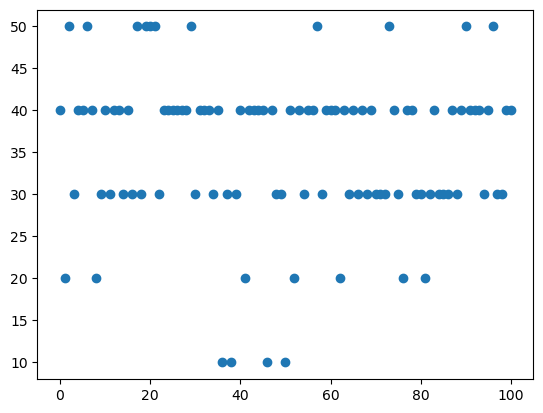

In [122]:
plt.scatter(range(0,101), oob_samples)

## Create a Function to Produce a Bootstrap Sample and Corresponding OOB Samples

In [60]:
#def bs(m):
oob_samples = []

def make_bs(X):
    # create bootstrap sample
    bss = rng.choice(X, size = X.shape[0], replace = True)

    # find out how many unique rows
    u = np.unique(bss, axis = 0)

    # for each row in X find out if it is in the bs sample
    for row in X:
        if np.isin(row, bss.shape[0]).sum()!=6:
            oob_samples.append(row)
        #print(row)
        #print(np.isin(row, bs))
        #break
    return bs, oob_samples

In [64]:
bs, oob = make_bs(X)
make_bs(X)

(array([[950, 286, 691, 548, 578, 863],
        [145, 962, 663, 721, 646,  11],
        [824, 895, 305, 293, 698, 469],
        [517, 927, 170, 822, 474, 681],
        [249, 733, 586,  68, 795,  18],
        [ 53, 580, 675, 526, 783, 864],
        [824, 895, 305, 293, 698, 469],
        [417, 734, 886, 476, 703, 816],
        [145, 962, 663, 721, 646,  11],
        [305, 537,  93, 901, 406, 721]], dtype=int64),
 [array([ 53, 580, 675, 526, 783, 864], dtype=int64),
  array([417, 734, 886, 476, 703, 816], dtype=int64),
  array([680, 544, 790, 437, 782,   8], dtype=int64),
  array([630, 678, 548, 786,  23, 705], dtype=int64),
  array([145, 962, 663, 721, 646,  11], dtype=int64),
  array([517, 927, 170, 822, 474, 681], dtype=int64),
  array([249, 733, 586,  68, 795,  18], dtype=int64),
  array([305, 537,  93, 901, 406, 721], dtype=int64),
  array([824, 895, 305, 293, 698, 469], dtype=int64),
  array([950, 286, 691, 548, 578, 863], dtype=int64),
  array([ 53, 580, 675, 526, 783, 864], dtype

## Create a Function to Produce a Decision Tree from a Data Sample

In [71]:
# assume regression problem
# y = data[:, -1]

def dT(data):
    bs, oob = make_bs(data)
    dt = DecisionTreeRegressor()
    
    X = bs[:, 0:-1]
    y = bs[:, -1]
    dt.fit(X, y)
    return dt   

In [72]:
data = X
dt = dT(data)
dt

DecisionTreeRegressor()

## Make Predictions using the Decision Tree 

## Select a Random Subset of Features/Columns from a Data Sample

In [76]:
# assume regression problem
# y = data[:, -1]

def dT(data):
    bs, oob = make_bs(data)
    dt = DecisionTreeRegressor()
    
    my_cols = rng.choice(range(0, data.shape[1]-1), 2, replace = False)
    X = bs[:, my_cols]
    y = bs[:, -1]
    dt.fit(X, y)
    return dt   

In [77]:
dt_new = dT(data)

In [78]:
dt_new.predict([[101,23]])

array([721.])

In [79]:
feature_idx = [0,1,2,3,4]

In [81]:
my_cols = rng.choice(feature_idx, 2, replace = False)
X[:, my_cols]

array([[526,  53],
       [476, 417],
       [437, 680],
       [786, 630],
       [721, 145],
       [822, 517],
       [ 68, 249],
       [901, 305],
       [293, 824],
       [548, 950]], dtype=int64)

## Put it All Together